In [1]:
import pandas as pd
df1 = pd.read_csv('Consumo_cerveja.csv', parse_dates=['Data'])

df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [2]:
df1.shape

(941, 7)

Replace ',' with '.' in columns 'Temperatura Media (C)', 'Temperatura Minima (C)',
'Temperatura Maxima (C)', and 'Precipitacao (mm)'

In [3]:
df1['Temperatura Media (C)']=df1['Temperatura Media (C)'].str.replace(',','.')
df1['Temperatura Minima (C)'] = df1['Temperatura Minima (C)'].str.replace(',','.')
df1['Temperatura Maxima (C)'] = df1['Temperatura Maxima (C)'].str.replace(',','.')
df1['Precipitacao (mm)'] = df1['Precipitacao (mm)'].str.replace(',','.')

In [4]:
df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


Create new feature 'Month' from the dates, consisting of the month of the year
Create new feature 'Day' from the dates, consisting of the day of the week
Set values from 'Data' column as indexes

In [5]:
df1['Month']=df1.Data.dt.month
df1['day']=df1.Data.dt.dayofweek
df1.iloc[335:341]

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,day
335,2015-12-02,22.1,18.2,29.4,0,0.0,30.471,12.0,2.0
336,2015-12-03,22.44,20.2,26.1,0,0.0,28.405,12.0,3.0
337,2015-12-04,22.76,19,29.1,0,0.0,29.513,12.0,4.0
338,2015-12-05,24.8,19.5,30.6,0.1,1.0,32.451,12.0,5.0
339,2015-12-06,23.12,20.6,28,0.1,1.0,32.780,12.0,6.0
340,2015-12-07,20.04,18,23.9,47.8,0.0,23.375,12.0,0.0


In [6]:
 df1.set_index('Data',inplace=True)

Only drop those instances where all values are null
Also, check the duplicate value

In [7]:
print(df1.isnull().sum())
print(df1.shape)

Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
Month                          576
day                            576
dtype: int64
(941, 8)


In [8]:
print(df1.isnull().all(axis=1).sum()) # calculate the number of rows which have null values in all columns

576


In [9]:
 df1.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,day
Data,,,,,,,,
2015-01-01,27.3,23.9,32.5,0,0.0,25.461,1.0,3.0
2015-01-02,27.02,24.5,33.5,0,0.0,28.972,1.0,4.0
2015-01-03,24.82,22.4,29.9,0,1.0,30.814,1.0,5.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,6.0
2015-01-05,23.82,21,28.3,0,0.0,28.900,1.0,0.0


We can see that the 576 instances have all null values in all columns. So we can easily drop those
instances

In [10]:
 df1.dropna(how='all',inplace=True)

In [11]:
 df1.shape

(365, 8)

In [12]:
print(df1.isnull().sum())

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
day                            0
dtype: int64


In [13]:
if df1.duplicated().any():
 print('True: duplicate instances')
else:
 print('False: No duplicate instances')

False: No duplicate instances


Check the data-types of the features
Convert them to appropriate data types

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    object 
 1   Temperatura Minima (C)       365 non-null    object 
 2   Temperatura Maxima (C)       365 non-null    object 
 3   Precipitacao (mm)            365 non-null    object 
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   day                          365 non-null    float64
dtypes: float64(4), object(4)
memory usage: 25.7+ KB


The columns with dtype object will be needed to be converted to appropriate dtype

In [15]:
df1['Temperatura Media (C)']=df1[['Temperatura Media (C)']].astype(float)
df1['Temperatura Minima (C)'] = df1['Temperatura Minima (C)'].astype(float)
df1['Temperatura Maxima (C)'] = df1['Temperatura Maxima (C)'].astype(float)
df1['Precipitacao (mm)'] = df1['Precipitacao (mm)'].astype(float)
# Final de semana is a categorical column(like yes or no) so it should be int, not float
df1['Final de Semana'] = df1['Final de Semana'].astype(int)

In [16]:
 df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int32  
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   day                          365 non-null    float64
dtypes: float64(7), int32(1)
memory usage: 24.2 KB


In [17]:
 df1.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,day
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,6.526027,3.0
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,3.452584,2.0
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,0.0
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000,1.0
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000,3.0
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000,5.0
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000,6.0


Check for outlier in all the columns using boxplot
Analyze the column with outliers

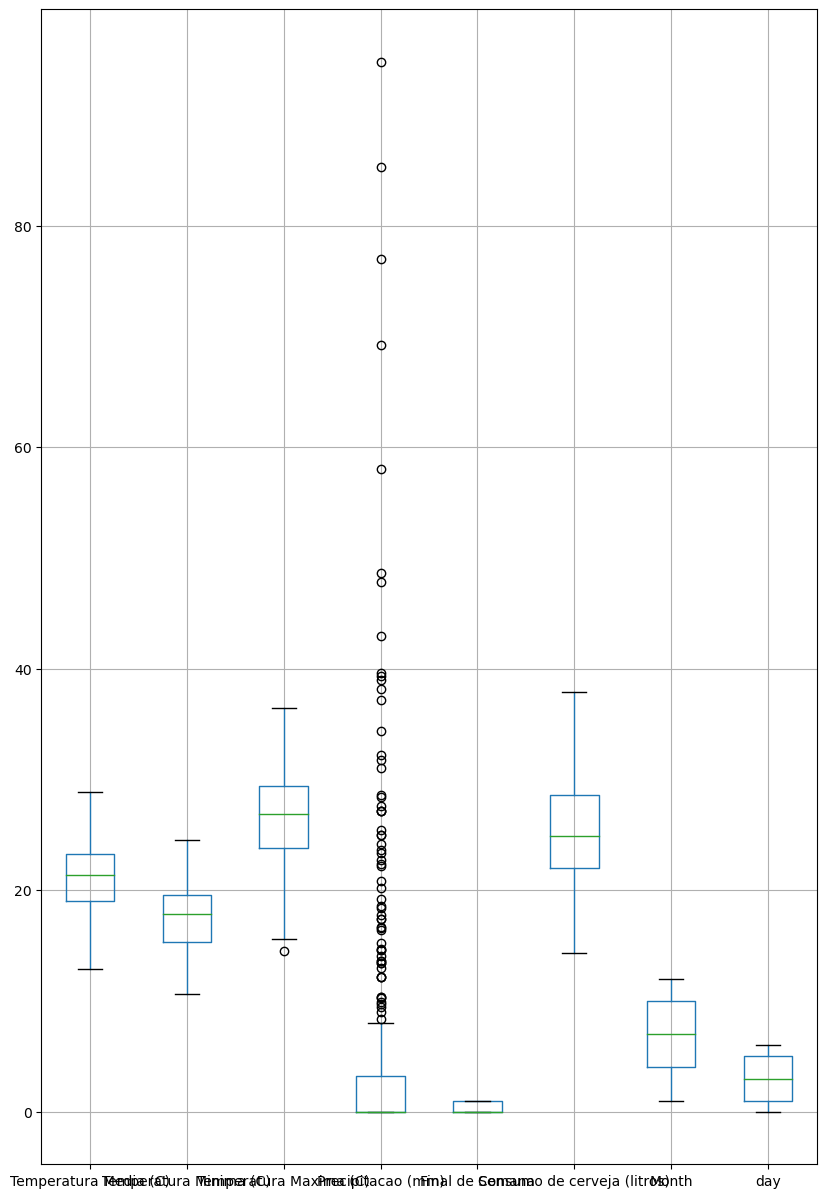

In [18]:
import matplotlib.pyplot as plt
df1.boxplot(figsize=(10,15))
plt.show()

Column 'Precipitacio' seems to have lots of outlier. Let's try to understand this using the distribution of
the data

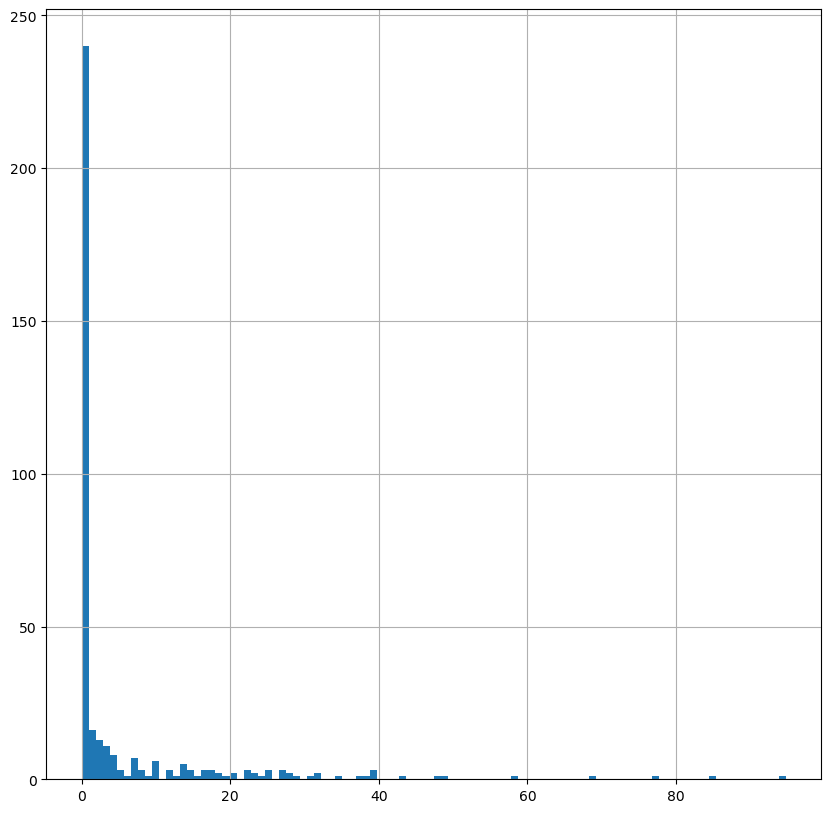

In [19]:
df1['Precipitacao (mm)'].hist(bins=100,figsize=(10,10))
plt.show()

In [20]:
print(df1['Precipitacao (mm)'][df1['Precipitacao (mm)']==0].value_counts())

0.0    218
Name: Precipitacao (mm), dtype: int64


We can see out of 365, 218 values are 0
We can see how the data is largely skewed, thus having so many outliers. It can also be possible that the
values with 0 percipitation are the instance where percipitation was not recorded. Lets clip all the values
over 40 in column 'Precipitacao (mm)' to 40

In [21]:
import numpy as np
df1['Precipitacao (mm)'] = np.clip(df1['Precipitacao (mm)'], 0, 40)

Plot the correlation between features
Analyze the correlation of independent features with respect to dependent features

D:\AnacondaInstallation\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

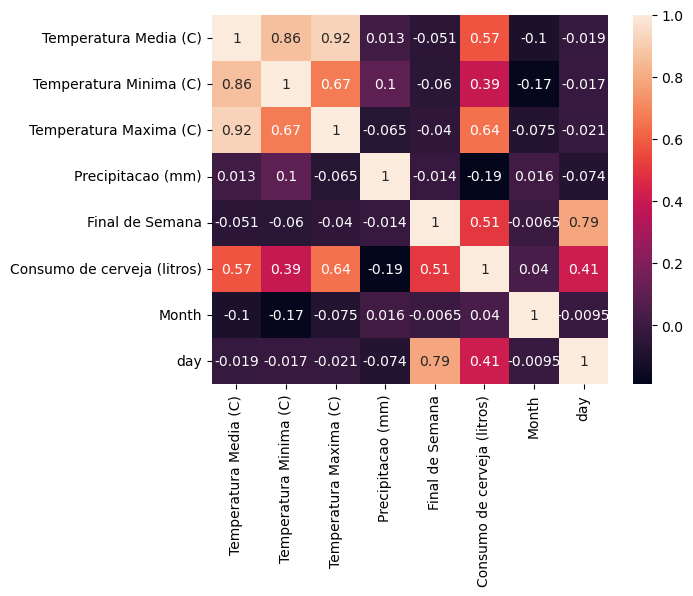

In [22]:
 import seaborn as sns
correlation = df1.corr()
sns.heatmap(correlation, annot = True)

All the features are showing high correlation with the output feature except 'Month' feature. In case of
'Precipitacao (mm)' feature, which has lots of values as 0, still it is showing quite good correlation, so we
will keep it

Split the dataset using sklearn, with 20% for testing with random_state=7

In [23]:
from sklearn.model_selection import train_test_split
X= df1.drop(columns=['Consumo de cerveja (litros)'],axis=1)
y= df1['Consumo de cerveja (litros)']
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,
random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 7)
(73, 7)
(292,)
(73,)


In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print('The final coefficients after training is:',lr.coef_)
print('The final intercept after training is:',lr.intercept_)

The final coefficients after training is: [-1.34341349e-01  1.22055186e-01  7.03305117e-01 -5.80658209e-02
  5.24988993e+00  1.36610989e-01  2.42604471e-03]
The final intercept after training is: 5.299119057068424


In [25]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
y_pred = lr.predict(X_test)
print("r2 score of our model is:", r2_score(y_test,y_pred))
print("mean absolute error of our model is:", mean_absolute_error(y_test,y_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,y_pred,squared=False))

r2 score of our model is: 0.6692125883575044
mean absolute error of our model is: 2.0233917644808708
root mean squared error of our model is: 2.473741467659846


In [26]:
import pickle 

In [27]:
with open('beer_pred_model.pkl', 'wb') as f:
    pickle.dump(lr, f)
